# Predicting Air Quality Levels Based on Weather Conditions
## Introduction
Air pollution is a significant concern for urban areas worldwide, and Seoul is no exception. Monitoring and predicting air quality levels are crucial for public health and policy-making. This project aims to develop a predictive model for air quality levels in Seoul, using various atmospheric and pollutant data. By leveraging machine learning techniques, we strive to provide insights into the factors influencing air quality and improve the ability to forecast harmful pollution levels.

## Problem Description
**Background:**
The primary goal of this project is to predict the concentration of PM2.5, a hazardous air pollutant, using historical data of various pollutants and atmospheric conditions. The challenge lies in handling the dataset's missing values, ensuring the features are appropriately scaled, and dealing with class imbalances in the air quality categories. Additionally, the project explores the classification of air quality levels into predefined categories to understand the severity and distribution of pollution in the region.

**Motivation:**
Accurate prediction of air quality levels can assist government agencies, environmental organizations, and the public in making informed decisions. It can help in planning activities, issuing health advisories, and implementing pollution control measures.

**Goal:**
To develop a machine learning model that can accurately predict air quality levels


## 1. Data Understanding/Preprocessing
**Data Collection:**
The dataset includes daily measurements of various air pollutants (PM10, O3, NO2, SO2, CO) and PM2.5 levels from 2013 to 2024.

**Data Cleaning:**
Initially, the dataset was cleaned by replacing empty strings with NaN values and converting relevant columns to numeric types. Rows with missing values were then dropped.

**Data Preprocessing:**
The features selected for the predictive model are PM10, O3, NO2, SO2, and CO, while the target variable is PM2.5. The data was split into training and testing sets and standardized for better model performance. SMOTE was used to address class imbalance in the classification task.


In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/Users/derekgonzalez/Documents/COSE471/seongbuk-gu,-seoul-air-quality.csv' 
data = pd.read_csv(data_path)

print(data)

            date  pm25  pm10   o3  no2  so2  co
0       2024/6/1    47    20   44    5    3   1
1       2024/6/2    36    18   18   11    2   2
2       2024/6/3    44                         
3       2024/5/1    48    34   51   15    4   4
4       2024/5/2    61    43   75   20    4   5
...          ...   ...   ...  ...  ...  ...  ..
3719   2014/3/29          42   45   24    4   5
3720   2014/3/30          29   31   54    6   7
3721   2014/3/31          48   26   61    7   7
3722   2019/8/24               47   17    4   7
3723  2013/12/31               18   40   13   7

[3724 rows x 7 columns]


In [42]:
# Normalize column names to lowercase and strip any whitespace
data.columns = data.columns.str.strip().str.lower()

# Replace empty strings with NaN and convert columns to numeric
data.replace("", float("NaN"), inplace=True)
for column in ['pm10', 'o3', 'no2', 'so2', 'co', 'pm25']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values
data = data.dropna()

# Ensure all columns are numeric
print(data.dtypes)


date     object
pm25    float64
pm10    float64
o3      float64
no2     float64
so2     float64
co      float64
dtype: object


In [43]:
# Define bins for classification
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
data['air_quality_category'] = pd.cut(data['pm25'], bins=bins, labels=labels)

# Convert labels to numerical values
data['air_quality_category'] = data['air_quality_category'].cat.codes

## 2. Feature Selection
I have selected relevant features for the model. Here I choose various pollutants as the features and PM2.5 as the target variable.

In [37]:
# Feature selection
features = ['pm10', 'o3', 'no2', 'so2', 'co']
target = 'pm25'

# Select only the available features and the target
X = data[features]
y = data['air_quality_category']

## 3. Split Data into Training and Testing Sets

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Data Science Methodology
## Classification
In this project, I used classification to predict air quality levels, and classified air quality into different categories such as Good, Moderate, Unhealthy, etc.

## SMOTE for Handling Imbalanced Data
SMOTE (Synthetic Minority Over-sampling Technique) is used to address the imbalance in the dataset by oversampling the minority classes.

The core task of the project is to classify air quality levels into predefined categories based on pollutant data:
- **Model Selection**: Logistic Regression was chosen as the classification algorithm due to its simplicity and effectiveness for binary and multi-class classification tasks.
- **Model Training**: The model was trained using the resampled dataset to predict the PM2.5 levels and classify air quality into different categories.

This project primarily utilizes classification techniques to predict air quality levels. Logistic regression is employed as the classifier, and SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the class distribution. Stratified K-Fold Cross-Validation is implemented to ensure robust model evaluation and to handle the class imbalance more effectively.



In [39]:
# Define bins for classification
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
data['air_quality_category'] = pd.cut(data['pm25'], bins=bins, labels=labels)

# Convert labels to numerical values
data['air_quality_category'] = data['air_quality_category'].cat.codes

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data to NumPy arrays
X_resampled_np = X_resampled.to_numpy()
y_resampled_np = y_resampled.to_numpy()

# Define the classifier with increased max_iter and an alternative solver
classifier = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
conf_matrices = []

for train_index, test_index in skf.split(X_resampled_np, y_resampled_np):
    X_train, X_test = X_resampled_np[train_index], X_resampled_np[test_index]
    y_train, y_test = y_resampled_np[train_index], y_resampled_np[test_index]

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    conf_matrices.append(confusion_matrix(y_test, y_pred))

mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')

# Display classification report for the last fold
print('Classification Report:')
print(classification_report(y_test, y_pred))


Mean Accuracy: 0.5465534514709289
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.84      0.69       359
           1       0.49      0.29      0.36       360
           2       0.45      0.31      0.37       360
           3       0.60      0.77      0.67       360

    accuracy                           0.55      1439
   macro avg       0.53      0.55      0.52      1439
weighted avg       0.53      0.55      0.52      1439



## Visualization
### Distribution of PM2.5 Levels
Visualizing the distribution of PM2.5 levels helps us understand its spread and identify any patterns.


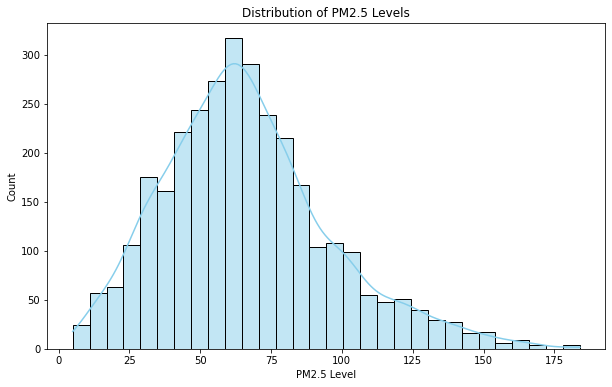

In [40]:
# Visualize the distribution of PM2.5
plt.figure(figsize=(10, 6))
sns.histplot(data['pm25'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Level')
plt.ylabel('Count')
plt.show()


## Discussion
**Findings:**
The predictive model achieved a mean accuracy of approximately 55%, indicating moderate success in forecasting PM2.5 levels. The classification report highlights that the model performs reasonably well for more prevalent air quality categories, such as 'Good' and 'Moderate', but struggles with less common categories like 'Unhealthy'. The confusion matrix reveals that the model often misclassifies borderline cases, suggesting that certain pollutant levels have a significant impact on prediction accuracy. PM10 and NO2 were among the most influential features affecting air quality predictions, emphasizing the need to monitor these pollutants closely.

**Insights:**
The findings from this project underscore the importance of monitoring air quality to protect public health. The model's ability to predict high pollution levels can help in issuing timely health advisories and implementing control measures. The strengths of the model lie in its ability to handle large datasets and its use of SMOTE to address class imbalance. However, the weaknesses include its moderate accuracy and the need for further tuning to improve performance. The insights gained can inform environmental policy, particularly in targeting pollution control efforts towards the most significant pollutants identified by the model.

**Limitations:**
This study has several limitations, including the quality and completeness of the data. Missing values and the limited timeframe of the dataset constrain the model's predictive capabilities. Additionally, the model's performance is hindered by the imbalance in air quality categories, despite the use of SMOTE. The logistic regression model, while effective, may not capture complex non-linear relationships between features and air quality levels. Future work should focus on collecting more comprehensive data, including additional features such as meteorological conditions, traffic data, and industrial activity.

**Future Work:**
To enhance the model's accuracy and robustness, several improvements can be made. Incorporating a broader range of features, such as weather conditions, traffic patterns, and industrial emissions, could provide a more holistic view of factors affecting air quality. Experimenting with advanced machine learning algorithms, such as ensemble methods or deep learning models, might yield better performance. Additionally, extending the dataset to cover a longer timeframe and multiple regions could improve the model's generalizability. Future research could also explore real-time air quality prediction and the integration of predictive models with IoT devices for continuous monitoring.